In [79]:
pip install py-AutoClean

In [80]:
import pandas as pd
from AutoClean import AutoClean
import matplotlib.pyplot as plt
import seaborn as sns


In [81]:
data = pd.read_csv('/content/WalmartDataset.csv', encoding='latin-1')

In [82]:
# Step 1: Initial exploration
print("Initial Dataset Overview:\n")
print("Null values in each column:\n", data.isnull().sum())
print("\nTotal Duplicates:", data.duplicated().sum())

data.head()


Initial Dataset Overview:

Null values in each column:
 Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode        23
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount         49
Profit            0
dtype: int64

Total Duplicates: 0


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,06/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [83]:
# print no od rows
print("Number of rows in the dataset:", len(data))

Number of rows in the dataset: 9994


In [84]:
# print the outliers
data.describe()



,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9945.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156972,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206668,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [85]:
# identify column types
data.dtypes

,0
Row ID,int64
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [86]:
def visualize_box_plot(df):
  numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

  # Creating box plots for each numerical column
  for column in numerical_columns:
      plt.figure(figsize=(8, 6))  # Set figure size
      sns.boxplot(x=df[column])  # Create box plot
      plt.xlabel(column)  # Set x-axis label
      plt.title(f'Box Plot of {column}')  # Set plot title
      plt.show()  # Show plot

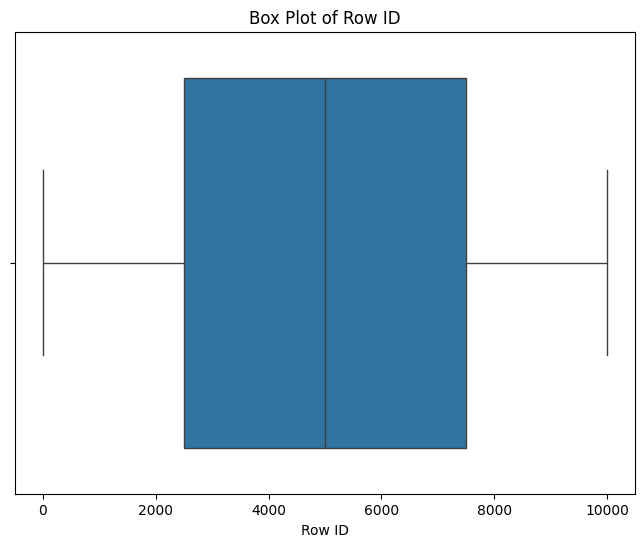

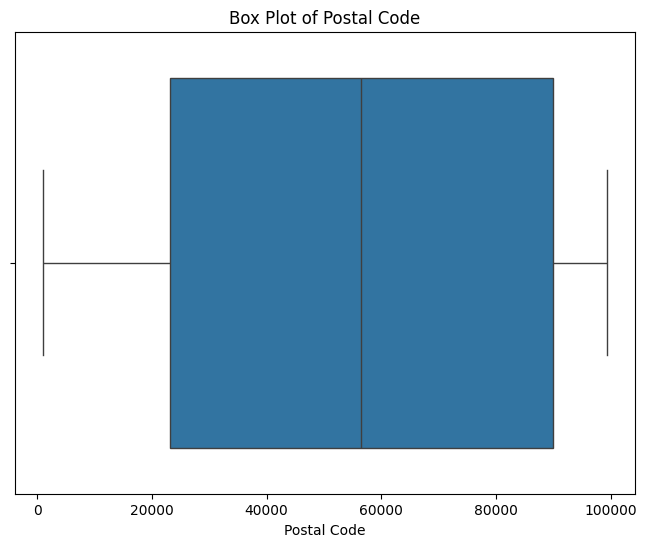

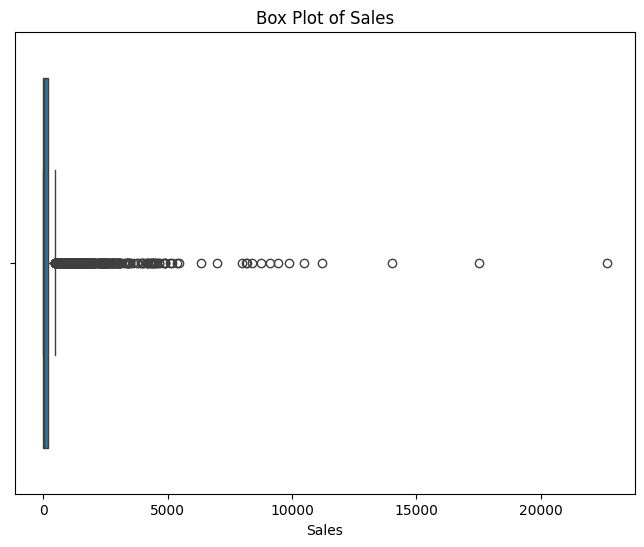

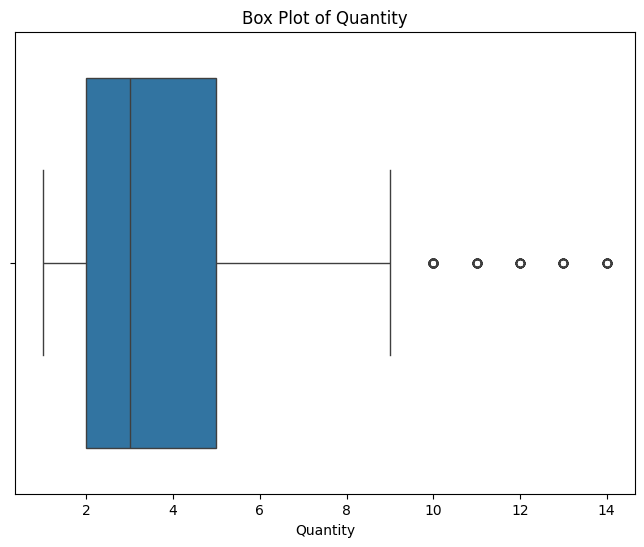

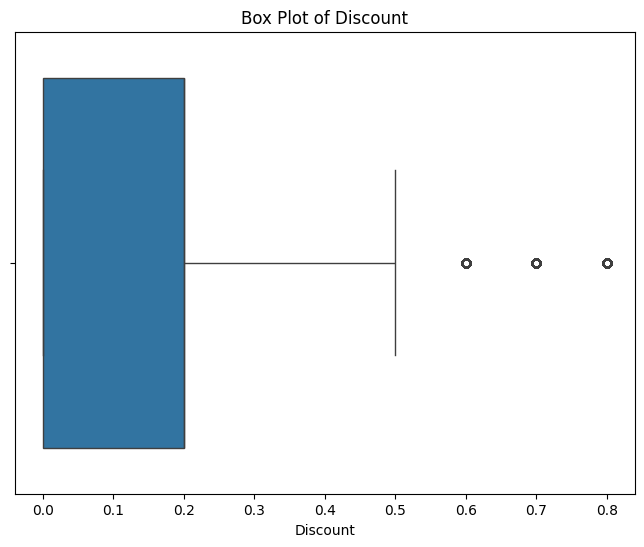

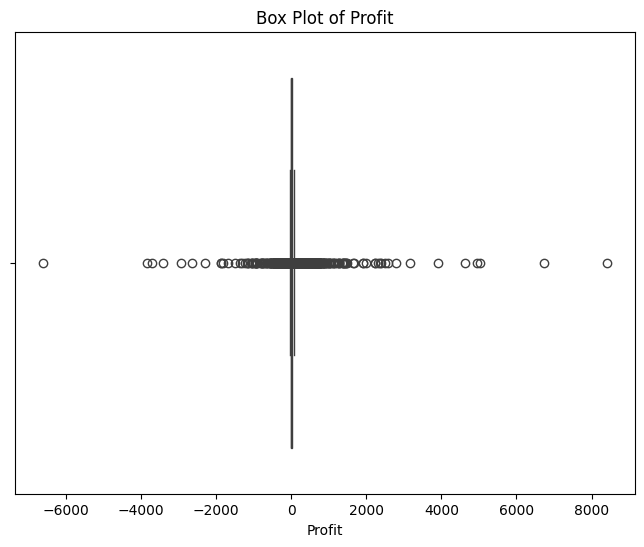

In [87]:
# Visualize before handling outliers
visualize_box_plot(data)

In [88]:
# Step 2: Apply AutoClean
cleaned_data = AutoClean(
    data,
    mode="auto",  # Cleans missing, outliers, and encodes categorical data
    encode_categ='auto',  # Encode categorical features
    missing_num=True,  # Impute missing numerical data
    missing_categ='auto',  # Impute missing categorical data
    outliers='delete',  # Detect and handle outliers
    duplicates = True,
    extract_datetime = 's',


)

AutoClean process completed in 4.444325 seconds
Logfile saved to: /content/autoclean.log


In [89]:
# Step 3: Post-cleaning overview
print("\nCleaned Dataset Overview:\n")
# Access the cleaned data using the 'output' attribute
print("Null values in each column:\n", cleaned_data.output.isnull().sum())
print("\nTotal Duplicates:", cleaned_data.output.duplicated().sum())
cleaned_data.output.head()


Cleaned Dataset Overview:

Null values in each column:
 Row ID                      0
Order ID                    0
Order Date                  0
Ship Date                   0
Ship Mode                   0
Customer ID                 0
Customer Name               0
Segment                     0
Country                     0
City                        0
State                       0
Postal Code                 0
Region                      0
Product ID                  0
Category                    0
Sub-Category                0
Product Name                0
Sales                       0
Quantity                    0
Discount                    0
Profit                      0
Day                         0
Month                       0
Year                        0
Country_United States       0
Ship Mode_First Class       0
Ship Mode_Same Day          0
Ship Mode_Second Class      0
Ship Mode_Standard Class    0
Region_Central              0
Region_East                 0
Region_South 

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region_East,Region_South,Region_West,Segment_Consumer,Segment_Corporate,Segment_Home Office,Sub-Category_lab,Category_Furniture,Category_Office Supplies,Category_Technology
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,False,True,False,True,False,False,4,True,False,False
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,False,True,False,True,False,False,5,True,False,False
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,False,False,True,False,True,False,10,False,True,False
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,False,True,False,True,False,False,16,True,False,False
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,False,True,False,True,False,False,14,False,True,False


In [90]:
# print the no of rows
print("Number of rows in the cleaned dataset:", len(cleaned_data.output))
# cleaned_data.output.head()

Number of rows in the cleaned dataset: 9994


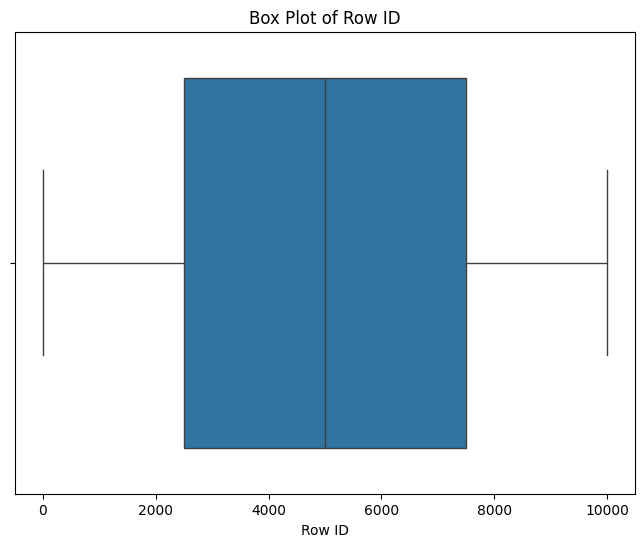

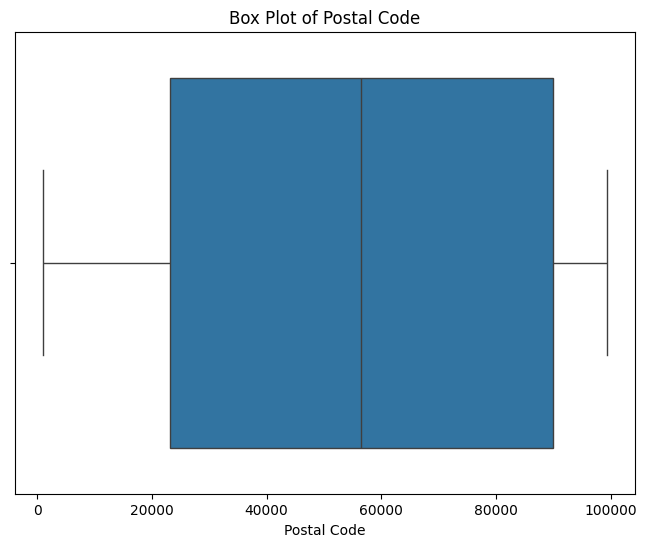

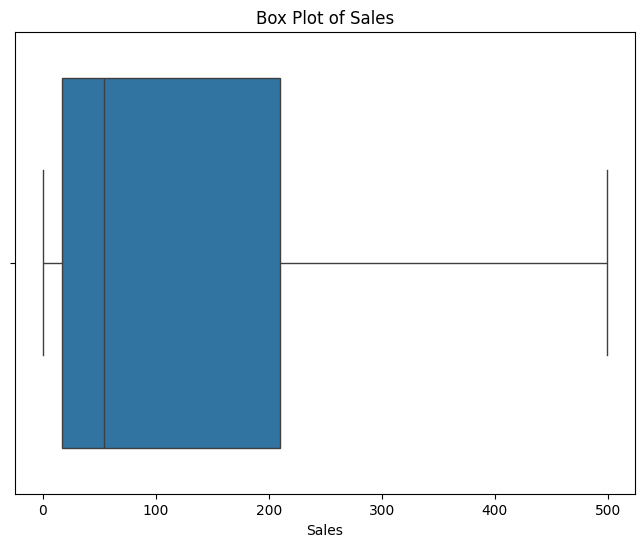

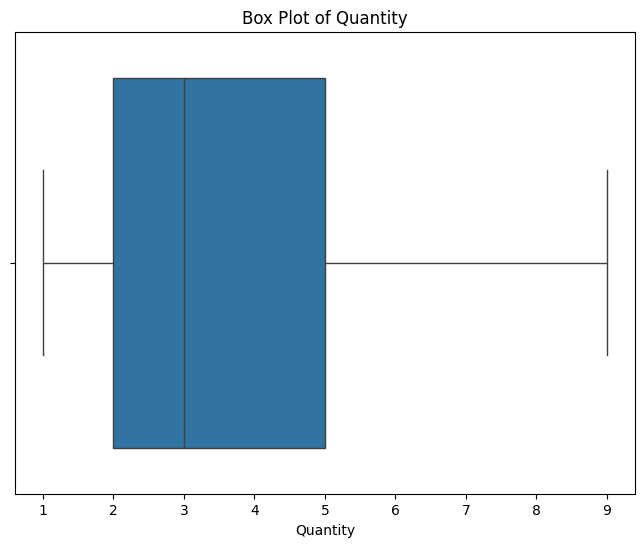

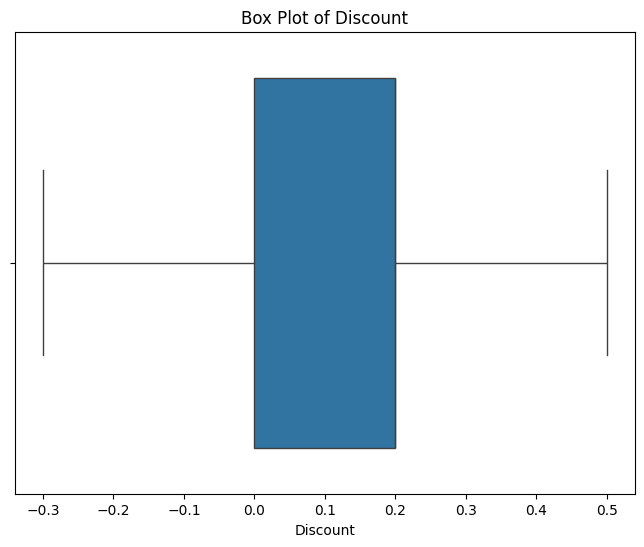

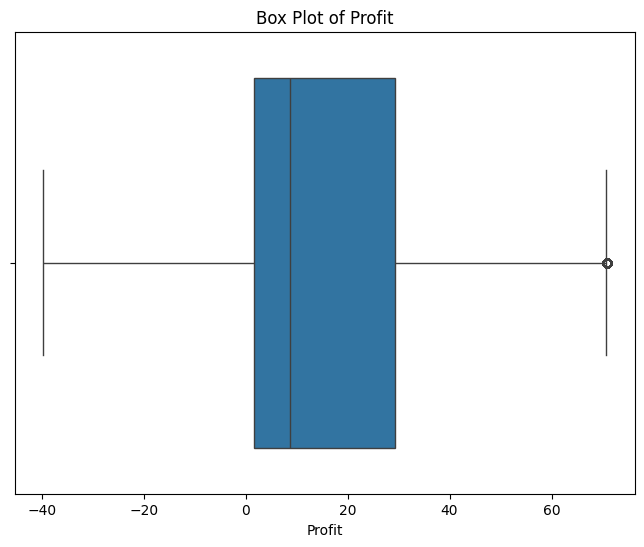

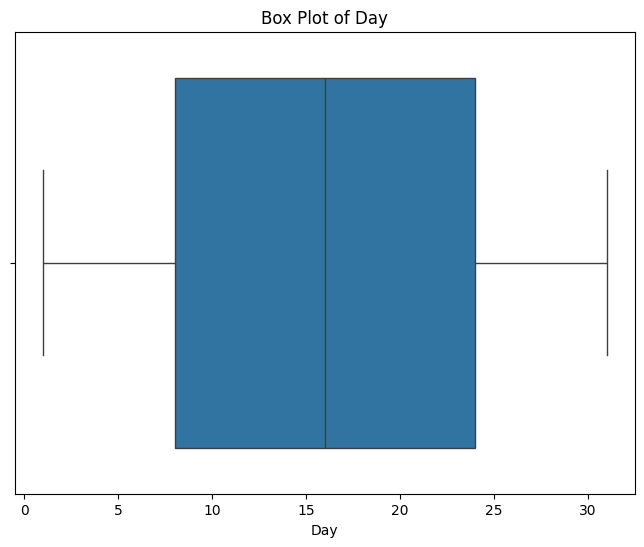

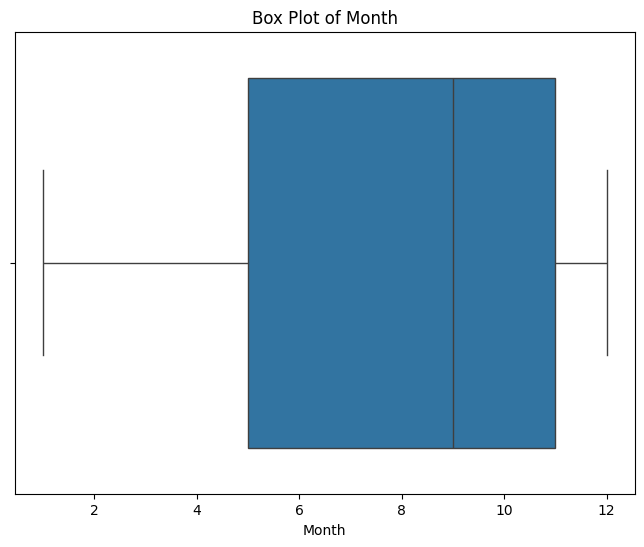

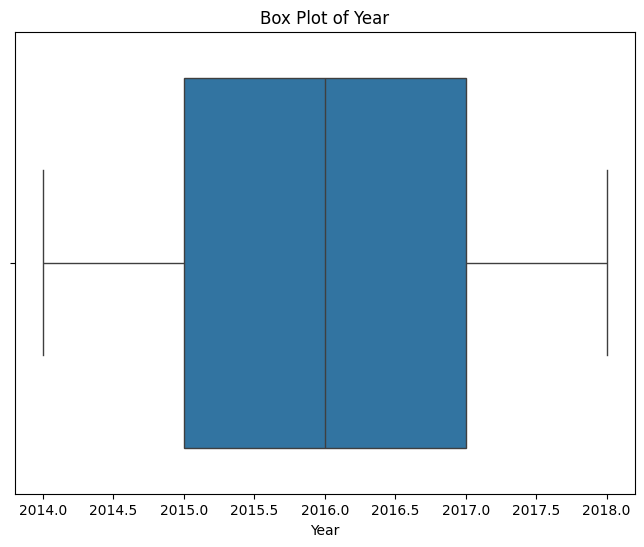

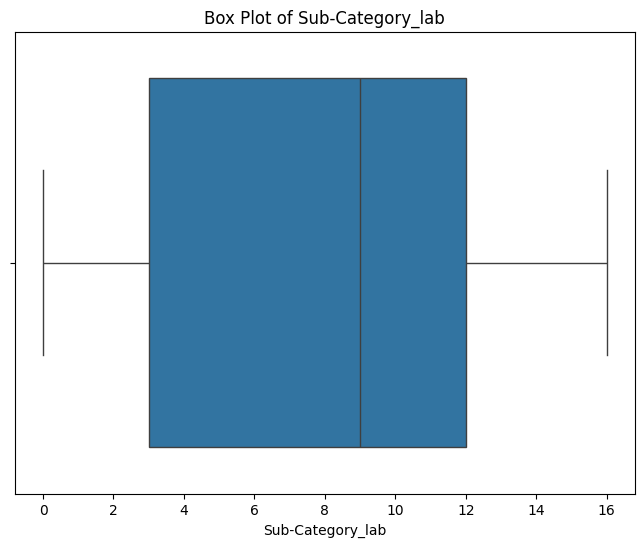

In [91]:
# visualize the box plot for cleaned_data
visualize_box_plot(cleaned_data.output)